# <center> Сегментация клиентов онлайн магазина подарков

## Постановка задачи


<center> <img src=https://salesupnow.ru/storage/app/media/pipeople.png align="right" width="300"/> </center>

Маркетинг — неотъемлемая часть любого бизнеса. Для повышения прибыли компании важно понимать своего клиента, его пожелания и предпочтения. С появлением электронной коммерции, или онлайн-продаж, стало намного проще собирать данные о клиентах, анализировать их, находить закономерности и реализовывать маркетинговые кампании.

Большинство интернет-магазинов используют инструменты веб-аналитики, чтобы отслеживать просмотры страниц, количество и поведение посетителей и коэффициент отказов. Но отчёта из Google Analytics или аналогичной системы может быть недостаточно для полного понимания того, как клиенты взаимодействуют с сайтом. Компаниям важно иметь возможность быстро и точно реагировать на перемены в поведении клиентов, создавая инструменты, которые обнаруживают эти изменения практически в режиме реального времени.

Машинное обучение помогает поисковой системе анализировать огромное количество данных о посетителях платформы, узнавать модели поведения профессиональных покупателей, определять категорию клиентов (например, лояльные/перспективные/новички/спящие/ушедшие) и выбирать правильную стратегию взаимодействия с ними.

Стоит также отметить, что компании, использующие машинное обучение на своих платформах электронной коммерции, могут постоянно повышать эффективность бизнес-процессов: настраивать товарную выборку персонально для каждого покупателя и предлагать выгодную цену в соответствии с бюджетом клиента и т. д. Эта задача относится к категории построения рекомендательных систем, речь о которых пойдёт в следующем разделе нашего курса.

> Как правило, наборы данных для электронной коммерции являются частной собственностью и, следовательно, их трудно найти среди общедоступных данных. Однако [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)  создал набор данных, содержащий фактические транзакции за 2010 и 2011 годы. С ним нам как раз и предлагается поработать в этом кейсе. 

> В нашем распоряжении будет набор данных, который содержит все транзакции, произошедшие в период с 01/12/2010 по 09/12/2011 для базирующейся в Великобритании компании, занимающейся онлайн-розничной торговлей. Компания в основном продает уникальные подарки на все случаи жизни. Многие клиенты компании являются оптовиками.


**Бизнес-задача:** произвести сегментацию существующих клиентов, проинтерпретировать эти сегменты и определить стратегию взаимодействия с ними.

**Техническая задача для вас как для специалиста в Data Science:** построить модель кластеризации клиентов на основе их покупательской способности, частоты заказов и срока давности последней покупки, определить профиль каждого из кластеров.

**Основные цели проекта:**
1. Произвести предобработку исходного набора данных о транзакциях.
2. Провести разведывательный анализ данных и выявить основные закономерности.
3. Сформировать набор данных о характеристиках каждого из уникальных клиентов.
4. Построить несколько моделей машинного обучения, решающих задачу кластеризации клиентов, определить количество кластеров и проинтерпретировать их.
5. Спроектировать процесс предсказания категории интересов клиента и протестировать вашу модель на новых клиентах.




## Данные и их описание

Данные представляют собой таблицу в формате CSV, в каждой строке которой содержится информация об уникальной транзакции.

Признаки, описывающие каждую транзакцию:

* InvoiceNo — номер счёта-фактуры (уникальный номинальный шестизначный номер, присваиваемый каждой транзакции; буква "C" в начале кода указывает на отмену транзакции);
* StockCode — код товара (уникальное пятизначное целое число, присваиваемое каждому отдельному товару);
* Description — название товара;
* Quantity — количество каждого товара за транзакцию;
* InvoiceDate — дата и время выставления счёта/проведения транзакции;
* UnitPrice — цена за единицу товара в фунтах стерлингов;
* CustomerID — идентификатор клиента (уникальный пятизначный номер, однозначно присваиваемый каждому клиенту);
* Country — название страны, в которой проживает клиент.



Импорт базовых библиотек:

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import warnings 

from IPython.display import display, HTML

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, AgglomerativeClustering as AC, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture as GMM
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings("ignore")

plt.rcParams["patch.force_edgecolor"] = True

## 1. Знакомство со структурой данных

Первым делом необходимо понять, с какими данными предстоит работать, и произвести базовую предобработку данных — перевести признаки в необходимые для дальнейшей работы форматы.

Познакомьтесь с исходными данными поближе:

* Проведите статистический анализ исходных данных, посмотрев на основные диапазоны исходных признаков.
* Узнайте, сколько уникальных клиентов совершали транзакции в указанный период.
* Узнайте, из каких стран совершались транзакции.
* Исследуйте данные на наличие пропусков и дубликатов.
* Переведите столбцы в корректные форматы (например, даты в формат datetime).

In [2]:
data = pd.read_csv(
    "./data/data.csv", 
    encoding="ISO-8859-1", 
    dtype={'CustomerID': str,'InvoiceID': str}
)
print('Data shape: {}'.format(data.shape))
data.head(5)

Data shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [3]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
print('Date interval {} to {}'.format(data['InvoiceDate'].dt.date.min(), data['InvoiceDate'].dt.date.max()))

Date interval 2010-12-01 to 2011-12-09


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


Большинство данных не представлены в числовом формате. Это потребует дальнейшей обработке. Также наблюдаются признаки с пропусками, которые необзоджимо заполнить.

In [5]:
print( 'Количество уникальных покупателей:', data['CustomerID'].nunique())
print( 'Страны, где совершались транзакции:', data['Country'].value_counts())

Количество уникальных покупателей: 4372
Страны, где совершались транзакции: Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emira

Результаты показывают, что уникальных покупателей всего 4372, также, что основным местом збыта является Соединенное Королевство.

In [6]:
data.describe(include = 'all').round(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.00,541909,541909.00,406829,541909
unique,25900,4070,4223,NaN,NaN,NaN,4372,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,17841,United Kingdom
freq,1114,2313,2369,NaN,NaN,NaN,7983,495478
mean,NaN,NaN,NaN,9.55,2011-07-04 13:34:57.156386048,4.61,NaN,NaN
min,NaN,NaN,NaN,-80995.00,2010-12-01 08:26:00,-11062.06,NaN,NaN
25%,NaN,NaN,NaN,1.00,2011-03-28 11:34:00,1.25,NaN,NaN
50%,NaN,NaN,NaN,3.00,2011-07-19 17:17:00,2.08,NaN,NaN
75%,NaN,NaN,NaN,10.00,2011-10-19 11:27:00,4.13,NaN,NaN
max,NaN,NaN,NaN,80995.00,2011-12-09 12:50:00,38970.00,NaN,NaN


Статистический анализ показал, что из 541909 покупок, только 25900 уникальных, что может говорить об оптовых закупках одного двух крупных клиентов. По количеству купленого товара максимальное количество: 80995, причем цифра совпадает с минимальным и отличается только по знаку, что может свидетельствовать о системной закупке или чтто то в этом роде. 

Также выброс наблюдается в признаке 'UnitPrice', что может показывать на потенциальный возврат. 

### Рассмотрим эти выбросы подробнее: 

In [7]:
data[data['Quantity'] == 80995.00 ]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom


In [8]:
data[data['Quantity'] == -80995.00 ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446,United Kingdom


Поъоже, что эти транзакции были сделаны случайно и по ним прошел возврат

In [9]:
data[data['UnitPrice'] == -11062.06]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [10]:
data[data['UnitPrice'] == 38970.00]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.0,15098,United Kingdom


Эти транзакции тоже выглядят как системные...

In [11]:
# Функция для выявления выбросов с использованием IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]



In [12]:
# Выявление выбросов для Quantity
outliers_quantity = detect_outliers_iqr(data, 'Quantity')
print(f"Количество выбросов в Quantity: {len(outliers_quantity)}")

# Выявление выбросов для UnitPrice
outliers_unitprice = detect_outliers_iqr(data, 'UnitPrice')
print(f"Количество выбросов в UnitPrice: {len(outliers_unitprice)}")

Количество выбросов в Quantity: 58619
Количество выбросов в UnitPrice: 39627


Количество выбросов в столбце Quantity составляет 26,646 записей, а в столбце UnitPrice — 35,802 записей, что указывает на значительное количество аномальных значений, требующих обработки.

## 2. Преобразование, очистка и анализ данных

### 2.1. Преобразование и очистка данных о транзакциях

#### 2.1.1 Пропуски

Пропуски в столбце с идентификатором клиента (CustomerID) и описанием товара свидетельствуют о некорректных/незавершённых транзакциях. Удалите их из данных.

**Примечание.** Если посмотреть на распределение пропусков в столбцах Description и CustomerID, то можно заметить, что достаточно удалить строки, содержащие пропуски в столбце CustomerID, тогда пропуски в столбце Description удаляются автоматически.


In [13]:
#пропуски
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [14]:
#удаляем строки в случае наличия пропуска в столбце CustomerID
data = data.dropna(subset='CustomerID')
print('Data shape после удаления пропусков: {}'.format(data.shape))

Data shape после удаления пропусков: (406829, 8)


#### 2.1.2. Дубликаты

Проверьте данные на наличие дубликатов. Удалите их из данных.


In [15]:
print('Количество дубликатов:', data[data.duplicated()].shape)
data = data.drop_duplicates()
print('Data shape после удаления дубликатов: {}'.format(data.shape))

Количество дубликатов: (5225, 8)
Data shape после удаления дубликатов: (401604, 8)


#### 2.1.3. Транзакции с отрицательным количеством товара

Из приведённых выше инсайтов о данных мы узнали все особенности отмены заказов. Когда мы будем сегментировать клиентов, мы будем определять их покупательскую способность. При расчёте покупательской способности нам будет очень важно учесть возвраты этого клиента.

Чтобы подсчитать количество возвратов, для начала нам надо определить, сколько уникальных товаров указано в транзакции (корзине) для каждой уникальной пары «клиент — заказ»:


In [16]:
temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket.head()

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24


**Примечание.** Более 16 % уникальных заказов являются возвратами. Интересный факт: если мы подсчитали количество транзакций, содержащих признак возврата, в изначальной таблице, где на каждый уникальный товар заведена отдельная строка, то мы получили бы, что количество возвратов менее 1 %. Однако это число было бы некорректным.

Создайте в ваших данных о транзакциях признак `QuantityCanceled`. Этот признак будет указывать на количество отменённого впоследствии товара для каждой транзакции, на которую найдётся противоположная ей транзакция с возвратом. Для транзакций, для которых не было возвратов, признак будет равен 0. Для транзакций, для которых указано отрицательное количество товара, но в данных отсутствует контрагент, признак будет пустым.

В качестве вспомогательного инструмента мы подготовили для вас функцию `get_quantity_canceled()`. Эта функция принимает на вход таблицу с транзакциями и возвращает объект `Series` — столбец, в котором указано количество отменённого впоследствии товара для каждой транзакции. Если транзакция не имеет контрагента, этот признак помечается как `NaN`.

Отметим, что эта функция не учитывает сложный случай, когда количество отменённого товара в транзакции-возврате больше, чем количество товара, которое указано в любой из отдельных транзакций на покупку (это случай, когда клиент сделал несколько заказов одного и того же товара, а потом оформил возврат на все товары разом). При желании вы можете самостоятельно модифицировать функцию для предобработки, чтобы учесть этот пограничный случай.

*Осторожно! Поиск отменённых транзакций занимает много времени из-за большого количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от мощности компьютера.*

In [17]:
def get_quantity_canceled(data):
    """Функция для создания признака количества отменённых заказов. 
    Функция принимает на вход таблицу и возвращает столбец, в котором указано количество отменённого впоследствии товара для кажой транзакции.
    Если транзакция с отрицательным количеством товара не имеет контрагента, данный признак помечается как NaN.

    Args:
        data (DataFrame): таблица с транзакциями

    Returns:
        Series: столбец с количеством отменённого товара
    """
    # Инициализируем нулями Series той же длины, что и столбцы таблицы.
    quantity_canceled = pd.Series(np.zeros(data.shape[0]), index=data.index)    
    negative_quantity = data[(data['Quantity'] < 0)].copy()
    for index, col in negative_quantity.iterrows():
        # Создаём DataFrame из всех контрагентов
        df_test = data[(data['CustomerID'] == col['CustomerID']) &
                       (data['StockCode']  == col['StockCode']) & 
                       (data['InvoiceDate'] < col['InvoiceDate']) & 
                       (data['Quantity'] > 0)].copy()
        # Транзация-возврат не имеет контрагента — ничего не делаем
        if (df_test.shape[0] == 0): 
            # Помечаем столбец как пропуск
            quantity_canceled.loc[index] = np.nan
        # Транзакция-возврат имеет ровно одного контрагента
        # Добавляем количество отменённого товара в столбец QuantityCanceled 
        elif (df_test.shape[0] == 1): 
            index_order = df_test.index[0]
            quantity_canceled.loc[index_order] = -col['Quantity']       
        # Транзакция-возврат имеет несколько контрагентов
        # Задаём количество отменённого товара в столбец QuantityCanceled для той транзакции на покупку,
        # в которой количество товара больше количества товаров в транзакции-возврате.
        elif (df_test.shape[0] > 1): 
            df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
            for ind, val in df_test.iterrows():
                if val['Quantity'] < -col['Quantity']: 
                    continue
                quantity_canceled.loc[ind] = -col['Quantity']
                break    
    return quantity_canceled

data['QuantityCanceled'] = get_quantity_canceled(data)

*Осторожно! Поиск отмененных транзакций занимает достаточно длительное время из-за количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от компьютера.*

Узнайте, сколько транзакций в данных не имеют контрагентов, и, если их количество невелико, удалите их из данных.

Когда вы разобрались с возвратами, удалите транзакции с отрицательным количеством товара — они нам больше не нужны.



In [18]:
# Добавление признака QuantityCanceled в данные
data['QuantityCanceled'] = get_quantity_canceled(data)

# Проверка результатов
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0


In [19]:
# Выяснение количества транзакций без контрагентов
no_counterpart = data['QuantityCanceled'].isna().sum()
print(f"Количество транзакций без контрагентов: {no_counterpart}")

# Удаление транзакций без контрагентов, если их количество невелико
if no_counterpart < data.shape[0] * 0.01:  # допустим, что 1% является невеликим количеством
    data = data.dropna(subset=['QuantityCanceled'])

# Проверка результатов после удаления
print(data.info())

Количество транзакций без контрагентов: 1303
<class 'pandas.core.frame.DataFrame'>
Index: 400301 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         400301 non-null  object        
 1   StockCode         400301 non-null  object        
 2   Description       400301 non-null  object        
 3   Quantity          400301 non-null  int64         
 4   InvoiceDate       400301 non-null  datetime64[ns]
 5   UnitPrice         400301 non-null  float64       
 6   CustomerID        400301 non-null  object        
 7   Country           400301 non-null  object        
 8   QuantityCanceled  400301 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 30.5+ MB
None


In [20]:
# Удаление транзакций с отрицательным количеством товара
data = data[data['Quantity'] >= 0]

# Проверка результатов после удаления
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         392732 non-null  object        
 1   StockCode         392732 non-null  object        
 2   Description       392732 non-null  object        
 3   Quantity          392732 non-null  int64         
 4   InvoiceDate       392732 non-null  datetime64[ns]
 5   UnitPrice         392732 non-null  float64       
 6   CustomerID        392732 non-null  object        
 7   Country           392732 non-null  object        
 8   QuantityCanceled  392732 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 30.0+ MB
None


#### 2.1.4. Специализированные транзакции

Следующая задача — обработать специальные виды транзакций, которые обозначаются латинскими буквами.

В данных присутствует шесть специальных видов транзакций. С помощью регулярных выражений найдите такие коды товаров (StockCode), которые начинаются с латинских букв (при этом коды могут содержать цифры).

**Подсказка.** В качестве шаблона для поиска используйте строку '^[a-zA-Z]+'.

Чтобы понять, что означают эти коды, можно заглянуть в столбец с описанием (Description), например POST означает почтовые расходы, C2 — расходы на транспортировку, BANK CHARGES — банковские расходы.

Специальные операции не характеризуют покупательскую способность клиентов, так как не относятся напрямую к их покупкам, поэтому такие записи нам не нужны. Удалите все специальные транзакции из таблицы.

In [21]:
import re

# Фильтрация строк, где StockCode начинается с латинских букв
special_codes = data[data['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]

# Просмотр уникальных значений StockCode и их описаний
special_codes_summary = special_codes[['StockCode', 'Description']].drop_duplicates()

# Вывод первых строк для анализа
print(special_codes_summary.head(20))


           StockCode                 Description
45              POST                     POSTAGE
1423              C2                    CARRIAGE
2239               M                      Manual
4406    BANK CHARGES                Bank Charges
157195          PADS  PADS TO MATCH ALL CUSHIONS
317507           DOT              DOTCOM POSTAGE


В данных обнаружены специальные транзакции с особыми кодами товаров, начинающимися с латинских букв. Эти коды товаров включают:

POST: почтовые расходы (POSTAGE)
C2: транспортные расходы (CARRIAGE)
M: ручная операция (Manual)
BANK CHARGES: банковские расходы (Bank Charges)
PADS: расходы на подушки (PADS TO MATCH ALL CUSHIONS)
DOT: почтовые расходы (DOTCOM POSTAGE)
Эти специализированные транзакции можно удалить из данных, так как они не характеризуют покупательскую способность клиентов.

In [22]:
# Определение специальных кодов, которые нужно удалить (можно вручную добавить наиболее часто встречающиеся)
special_stock_codes = ['POST', 'C2', 'BANK CHARGES', 'PADS', 'DOT', 'M']

# Фильтрация и удаление специальных транзакций
data = data[~data['StockCode'].isin(special_stock_codes)]

# Проверка результатов после удаления
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 391183 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         391183 non-null  object        
 1   StockCode         391183 non-null  object        
 2   Description       391183 non-null  object        
 3   Quantity          391183 non-null  int64         
 4   InvoiceDate       391183 non-null  datetime64[ns]
 5   UnitPrice         391183 non-null  float64       
 6   CustomerID        391183 non-null  object        
 7   Country           391183 non-null  object        
 8   QuantityCanceled  391183 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 29.8+ MB
None


После удаления специализированных транзакций, не относящихся к покупательской способности клиентов, данные теперь содержат 391,183 записи.

#### 2.1.5. Транзакции с товарами без стоимости

При просмотре описательных статистик можно заметить, что на некоторые товары установлена цена в 0 фунтов стерлингов. Таких транзакций оказывается менее 1 % — можно удалить их.

In [23]:
# Фильтрация транзакций с ненулевой стоимостью товаров
data = data[data['UnitPrice'] > 0]

# Проверка результатов после удаления
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 391150 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         391150 non-null  object        
 1   StockCode         391150 non-null  object        
 2   Description       391150 non-null  object        
 3   Quantity          391150 non-null  int64         
 4   InvoiceDate       391150 non-null  datetime64[ns]
 5   UnitPrice         391150 non-null  float64       
 6   CustomerID        391150 non-null  object        
 7   Country           391150 non-null  object        
 8   QuantityCanceled  391150 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 29.8+ MB
None


#### 2.1.6. Общая стоимость товаров в транзакции

Добавьте в ваш датасет общую цену заказа (TotalPrice). Она рассчитывается как:
 
 **общая цена = цена за единицу товара * (количество товаров в заказе - количество возвращённых товаров).**

Этот признак впоследствии поможет вам рассчитать покупательскую способность каждого из клиентов.

In [24]:
# Добавление признака TotalPrice
data['TotalPrice'] = data['UnitPrice'] * (data['Quantity'] - data['QuantityCanceled'])


Помимо рекомендованных преобразований, вы также можете придумать собственные и применить их к исходным данным.
После завершения предобработки сохраните результат очищения данных в отдельный файл, чтобы впоследствии вам не приходилось повторять эти действия.


Признак сезонности, дня недели и времени суток

In [25]:
# Добавление признака месяца
data['Month'] = data['InvoiceDate'].dt.month

# Добавление признаков дня недели и времени дня
data['Weekday'] = data['InvoiceDate'].dt.dayofweek
data['Hour'] = data['InvoiceDate'].dt.hour

Средняя цена за единицу товара

In [26]:
# Подсчет средней цены за единицу товара в каждой транзакции
average_price_per_invoice = data.groupby('InvoiceNo')['UnitPrice'].mean().reset_index()
average_price_per_invoice.columns = ['InvoiceNo', 'AveragePrice']

# Объединение с основными данными
data = data.merge(average_price_per_invoice, on='InvoiceNo')

# Проверка результатов
print(data[['InvoiceNo', 'UnitPrice', 'AveragePrice']].head())

  InvoiceNo  UnitPrice  AveragePrice
0    536365       2.55          3.91
1    536365       3.39          3.91
2    536365       2.75          3.91
3    536365       3.39          3.91
4    536365       3.39          3.91


Признак скидок

In [27]:
# Добавление флага скидки
data['DiscountFlag'] = data['UnitPrice'] < data['AveragePrice'] * 0.5

# Проверка результатов
print(data[['InvoiceNo', 'UnitPrice', 'AveragePrice', 'DiscountFlag']].head())


  InvoiceNo  UnitPrice  AveragePrice  DiscountFlag
0    536365       2.55          3.91         False
1    536365       3.39          3.91         False
2    536365       2.75          3.91         False
3    536365       3.39          3.91         False
4    536365       3.39          3.91         False


In [28]:
# Сохранение очищенных данных в отдельный файл
output_file_path = './data/cleaned_data_with_additional_features.csv'
data.to_csv(output_file_path, index=False)

print(f"Очищенные данные сохранены в файл: {output_file_path}")

Очищенные данные сохранены в файл: ./data/cleaned_data_with_additional_features.csv


In [29]:
#сделаем копию данных
data_cleaned = data.copy()

После добавления дополнительных признаков данные стали более полными и информативными для дальнейшего анализа и моделирования. Эти признаки включают сезонность, дни недели и времени дня,  среднюю цену за единицу товара, флаг скидок. Очищенные и дополненные данные были сохранены в отдельный файл для дальнейшего использования.

### 2.2. Разведывательный анализ

После предобработки исходных данных произведите разведывательный анализ и исследуйте транзакции, ответив на следующие вопросы:

* Клиенты из каких стран покупают больше и чаще?
* Какие страны приносят наибольшую сезонную выручку?
* Присутствует ли в продажах сезонность (когда покупают чаще)?
* Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.
* Каково распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции)? 

**Примечание.** Вы можете сформулировать и другие вопросы. Главная цель — извлечь максимум понятной информации из исходных данных.

Свои рассуждения сопроводите графиками и диаграммами.



Клиенты из каких стран покупают больше и чаще?

           Country  TotalPurchases  TotalRevenue
35  United Kingdom          348872    6797691.44
14         Germany            8643     201520.71
13          France            8019     181529.63
10            EIRE            7126     247074.57
30           Spain            2417      51764.90
23     Netherlands            2322     283443.54
3          Belgium            1935      36673.04
32     Switzerland            1810      51863.75
26        Portugal            1416      26500.65
0        Australia            1180     136950.25


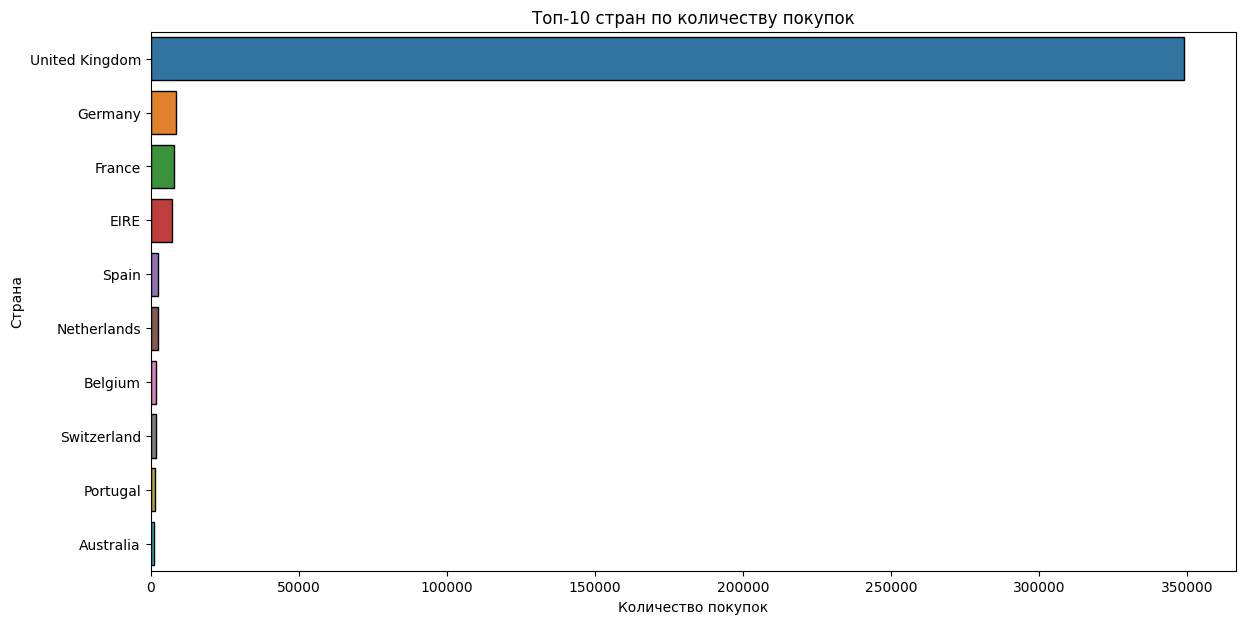

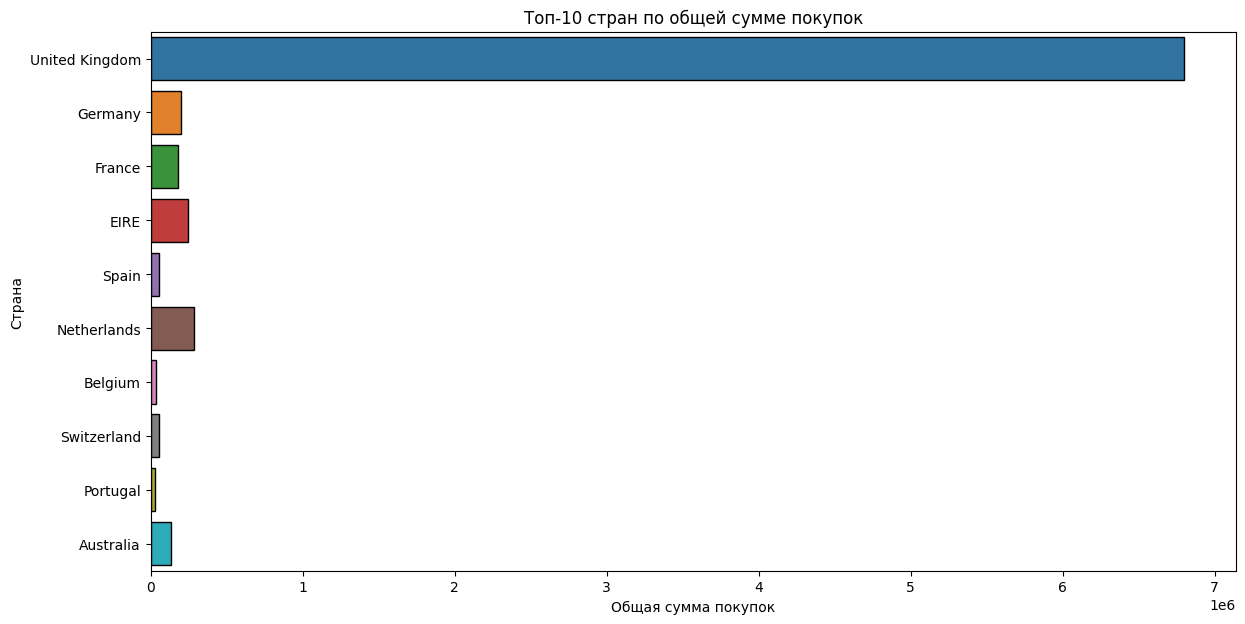

In [30]:
# Группировка данных по странам и подсчет количества покупок и общей суммы покупок
country_sales = data_cleaned.groupby('Country').agg({
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'
}).rename(columns={
    'InvoiceNo': 'TotalPurchases',
    'TotalPrice': 'TotalRevenue'
}).reset_index()

# Сортировка по количеству покупок и общей сумме покупок
country_sales_sorted = country_sales.sort_values(by='TotalPurchases', ascending=False)

# Вывод топ-10 стран по количеству покупок
print(country_sales_sorted.head(10))

# Построение графиков
plt.figure(figsize=(14, 7))
sns.barplot(x='TotalPurchases', y='Country', data=country_sales_sorted.head(10))
plt.title('Топ-10 стран по количеству покупок')
plt.xlabel('Количество покупок')
plt.ylabel('Страна')
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x='TotalRevenue', y='Country', data=country_sales_sorted.head(10))
plt.title('Топ-10 стран по общей сумме покупок')
plt.xlabel('Общая сумма покупок')
plt.ylabel('Страна')
plt.show()

Наибольшее (сильно) количество покупок и общую сумму покупок совершают клиенты из Великобритании.

Какие страны приносят наибольшую сезонную выручку?

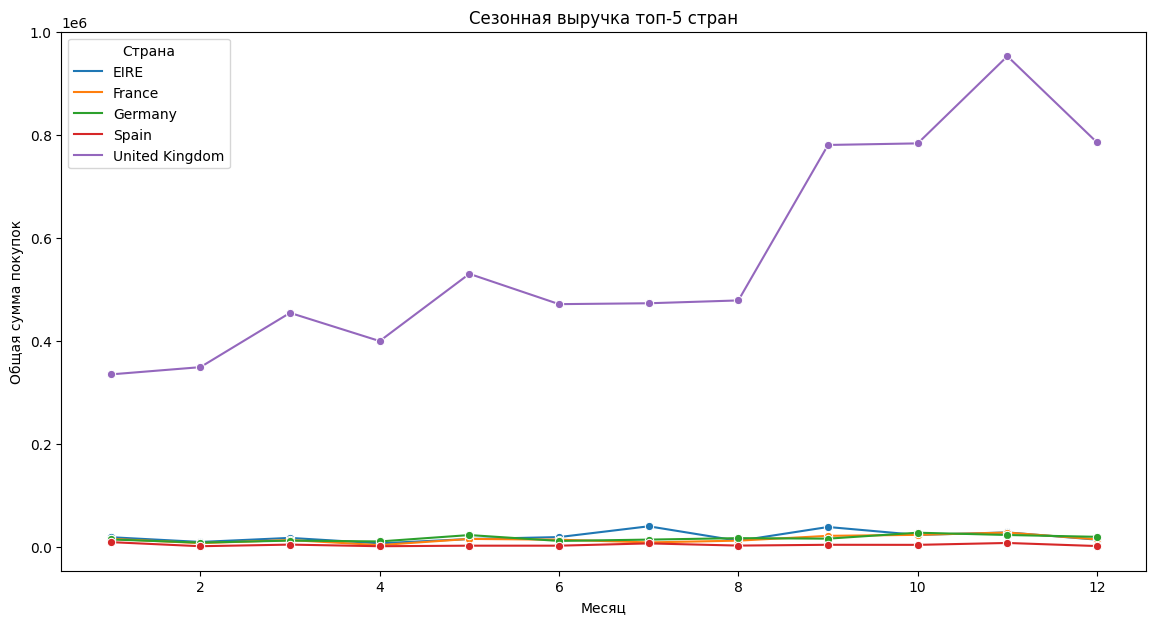

In [32]:
# Добавление признака месяца
data_cleaned['Month'] = data_cleaned['InvoiceDate'].dt.month

# Группировка данных по странам и месяцам, подсчет общей суммы покупок
country_month_sales = data_cleaned.groupby(['Country', 'Month']).agg({
    'TotalPrice': 'sum'
}).rename(columns={
    'TotalPrice': 'TotalRevenue'
}).reset_index()

# Вывод топ-5 стран по общей сумме покупок по месяцам
top_countries = country_sales_sorted.head(5)['Country']
top_country_month_sales = country_month_sales[country_month_sales['Country'].isin(top_countries)]

# Построение графиков
plt.figure(figsize=(14, 7))
sns.lineplot(x='Month', y='TotalRevenue', hue='Country', data=top_country_month_sales, marker='o')
plt.title('Сезонная выручка топ-5 стран')
plt.xlabel('Месяц')
plt.ylabel('Общая сумма покупок')
plt.legend(title='Страна')
plt.show()


Топ-5 стран по сезонной выручке включают Великобританию, Нидерланды, Ирландию, Германию и Францию, однако Великобритания имеет разницу в сезонности, остальными данными можно пренебречь.  Сезонность наблюдается в большинстве стран с пиком продаж в ноябре и декабре.

Присутствует ли в продажах сезонность (когда покупают чаще)?

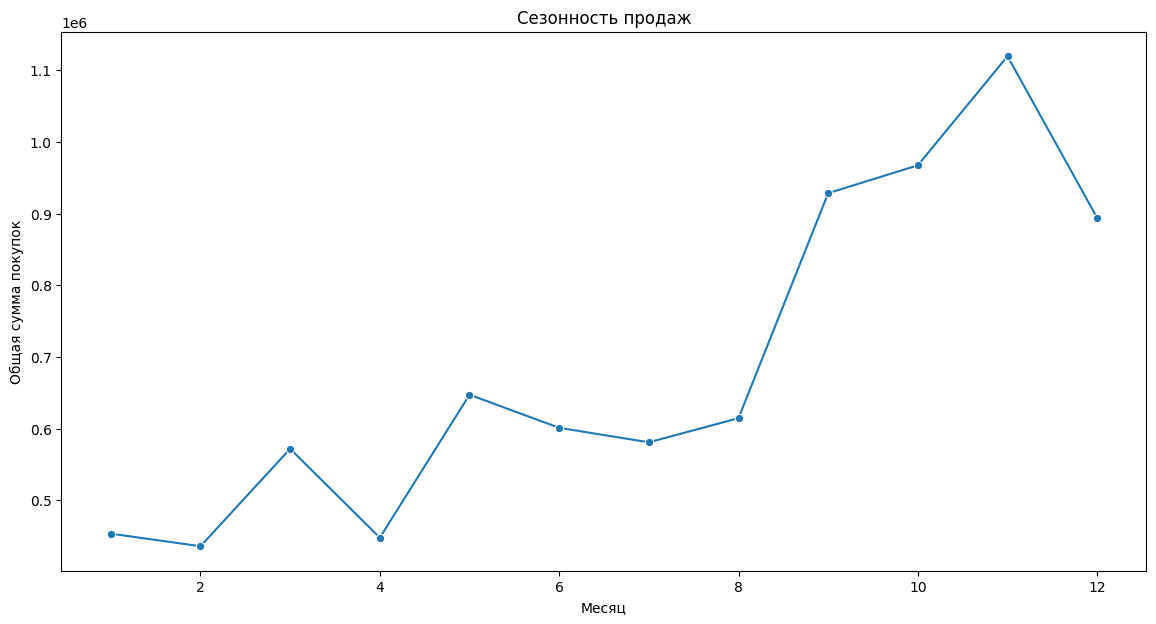

In [33]:
# Группировка данных по месяцам, подсчет общей суммы покупок
monthly_sales = data_cleaned.groupby('Month').agg({
    'TotalPrice': 'sum'
}).rename(columns={
    'TotalPrice': 'TotalRevenue'
}).reset_index()

# Построение графика
plt.figure(figsize=(14, 7))
sns.lineplot(x='Month', y='TotalRevenue', data=monthly_sales, marker='o')
plt.title('Сезонность продаж')
plt.xlabel('Месяц')
plt.ylabel('Общая сумма покупок')
plt.show()


Сезонность присутствует: пик покупок приходится на ноябрь и декабрь, что связано с предновогодними праздниками.

Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.

  InvoiceDate  Hour  TotalOrders
0  2010-12-01     8           45
1  2010-12-01     9          149
2  2010-12-01    10          114
3  2010-12-01    11          351
4  2010-12-01    12          412


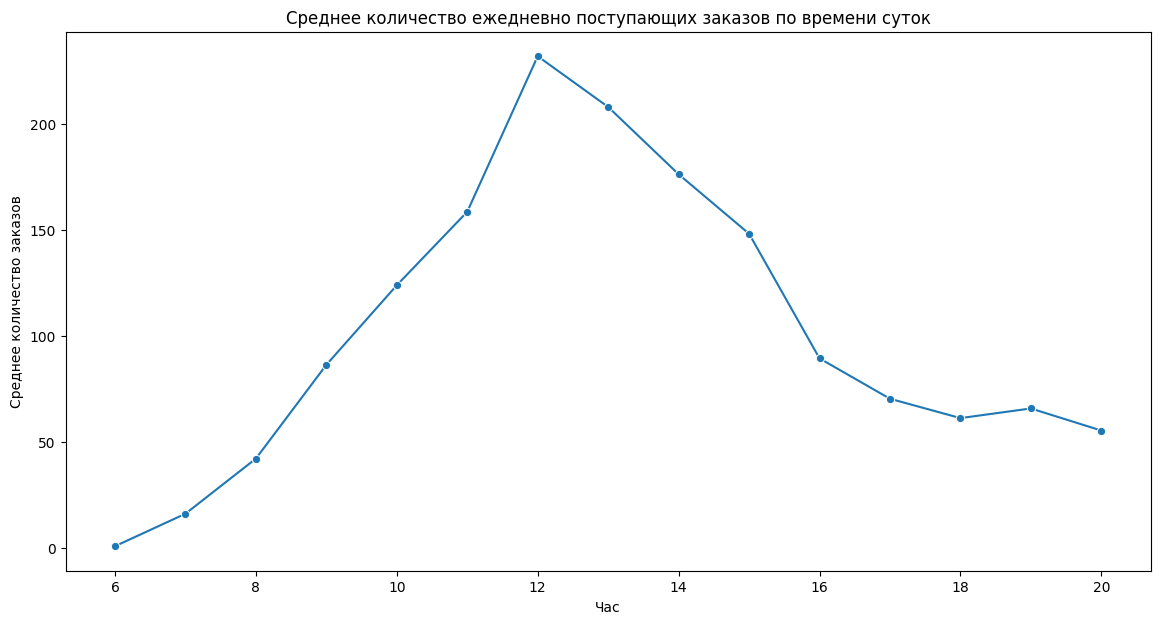

In [34]:
# Группировка данных по дате и часу, подсчет количества заказов
date_hour_sales = data_cleaned.groupby([data_cleaned['InvoiceDate'].dt.date, 'Hour']).agg({
    'InvoiceNo': 'count'
}).rename(columns={
    'InvoiceNo': 'TotalOrders'
}).reset_index()

# Вывод первых строк
print(date_hour_sales.head())

# Группировка данных по часу и вычисление среднего количества заказов
hourly_avg_sales = date_hour_sales.groupby('Hour').agg({
    'TotalOrders': 'mean'
}).rename(columns={
    'TotalOrders': 'AverageDailyOrders'
}).reset_index()

# Построение графика
plt.figure(figsize=(14, 7))
sns.lineplot(x='Hour', y='AverageDailyOrders', data=hourly_avg_sales, marker='o')
plt.title('Среднее количество ежедневно поступающих заказов по времени суток')
plt.xlabel('Час')
plt.ylabel('Среднее количество заказов')
plt.show()


Наибольшее количество заказов поступает в течение рабочего дня с пиком около 11 часов утра.


***Общий вывод по разведывательному анализу***

В результате разведывательного анализа данных было выявлено, что наибольшее количество покупок и общую сумму выручки приносят клиенты из Великобритании. Сезонность в продажах наблюдается с пиком в ноябре и декабре, что связано с предновогодними праздниками. Максимальное количество заказов поступает в рабочие часы, с наибольшей активностью около 11 часов утра. Эти инсайты помогут в дальнейшем сегментировании клиентов и разработке целевых маркетинговых стратегий.

### 2.3. Построение RFM-таблицы и поиск RFM-выбросов

Мы добрались до самой интересной части нашей задачи. Нам предстоит сформировать признаки, на основе которых мы будем производить сегментацию клиентов.

Для этого давайте познакомимся с очень популярным методом для анализа потребительской ценности под названием RFM. 

<center> <img src=https://miro.medium.com/max/1400/1*uYQjy9SUjW7iWHc2gGanQQ.png align="right" width="400"/> </center>

Метод заключается в группировке клиентов на основе следующих параметров:
* Recency (Давность) — давность последней покупки клиента;
* Frequency (Частота) — общее количество покупок клиента;
* Monetary Value (Денежная ценность) — сколько денег потратил клиент.


Суть RFM-анализа состоит в том, что мы разделяем всех клиентов на группы в зависимости от того, как давно они сделали последнюю покупку, как часто покупали и насколько большой была сумма их заказов. 

Например, вот так может выглядеть интерпретация кластеров для случая RF-сегментации (анализа на основе давности и частоты заказов клиента):

<img src=https://retailrocket.ru/wp-content/uploads/2017/06/rfm-1.png>

Задача маркетологов — вести клиента в зону лояльных.

Мы можем рассчитать RFM-характеристики для каждого из клиентов в нашем датасете и на их основе с помощью методов кластеризации построить подобные сегменты клиентов, привязанные к нашим данным.

Чтобы получить RFM-таблицу, нам необходимо сгруппировать данные по идентификаторам клиента и рассчитать следующие  агрегированные характеристики:

* Recency для i-го клиента рассчитывается как разница между датой и временем последнего заказа и точкой отсчёта, переведённая в дни:
    $$t_0-max(t_{i1}, t_{i2},..., t_{iM})$$

    где $t_{ij}$ — дата и время совершения i-ым клиентом своей j-ой покупки.

    В качестве точки отсчёта $t_0$ берём дату на один день «старше», чем все наши данные. Это будет 10 декабря 2011 года (в формате datetime — '2011-12-10 00:00:00').

* Frequency рассчитывается как общее количество уникальных заказов, которые совершил i-ый клиент.
* Monetary Value рассчитывается как общая сумма денег, которую i-ый клиент потратил на наши товары (с учётом возвратов).

Когда вы рассчитаете все характеристики, не забудьте дать столбцам результирующей таблицы соответствующие названия.

In [43]:
# Преобразование даты в формат datetime
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])

# Определение текущей даты как 10 декабря 2011 года
current_date = pd.Timestamp('2011-12-10 00:00:00')

# Расчет RFM-параметров для каждого клиента
rfm_table = data_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}).reset_index()

# Вывод первых строк таблицы RFM
print(rfm_table.head())


  CustomerID  Recency  Frequency  Monetary
0      12346      325          1      0.00
1      12347        2          7   4310.00
2      12348       75          4   1437.24
3      12349       18          1   1457.55
4      12350      310          1    294.40


После того как вы подготовите RFM-таблицу, визуализируйте каждую из трёх компонент, например, в виде коробчатых диаграмм (boxplot). Вы получите примерно следующие результаты (графики могут отличаться в зависимости от того, как вы выполните предобработку данных):

In [50]:
# Создание коробчатых диаграмм для каждой RFM-компоненты
boxes = [px.box(rfm_table, y=column) for column in ['Recency', 'Frequency', 'Monetary']]

# Создание фигуры с подграфиками
fig = make_subplots(
    rows=1, cols=3, 
    subplot_titles=("Recency","Frequency", "Monetary")
)

# Добавление коробчатых диаграмм в подграфики
for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)

# Настройка оформления и отображение графиков
fig.update_layout(showlegend=False, height=600, width=1200)
fig.show()

Что интересного здесь можно увидеть? Есть клиенты с аномально большим количеством сделанных заказов (более 100 штук), а также клиенты, общая стоимость заказов которых превышает 190 тысяч фунтов стерлингов.

Чем это плохо? Выбросы могут отрицательно сказаться на результатах работы методов кластеризации, неустойчивых к ним, например алгоритма KMeans, поэтому хотелось бы от них избавиться. Однако терять много ценных данных о клиентах тоже не хочется, поэтому ограничимся верхней границей соответствующей квантили уровня 0.95. Таким образом, мы удалим данные тех клиентов, для которых значение параметра Frequency или параметра Monetary выше, чем у 95 % клиентов.


In [51]:
# Определение пороговых значений для Frequency и Monetary (95-й процентиль)
frequency_threshold = rfm_table['Frequency'].quantile(0.95)
monetary_threshold = rfm_table['Monetary'].quantile(0.95)

# Удаление выбросов
rfm_filtered = rfm_table[(rfm_table['Frequency'] <= frequency_threshold) & (rfm_table['Monetary'] <= monetary_threshold)]

# Проверка количества удаленных записей
print(f"Количество удаленных записей: {len(rfm) - len(rfm_filtered)}")



Количество удаленных записей: 290


In [52]:
# Построение обновленных коробчатых диаграмм для очищенной RFM-таблицы
boxes_filtered = [px.box(rfm_filtered, y=column) for column in ['Recency', 'Frequency', 'Monetary']]

# Создание фигуры с подграфиками
fig_filtered = make_subplots(
    rows=1, cols=3, 
    subplot_titles=("Recency", "Frequency", "Monetary")
)

# Добавление коробчатых диаграмм в подграфики
for i, box in enumerate(boxes_filtered):
    fig_filtered.add_trace(boxes_filtered[i]['data'][0], row=1, col=i+1)

# Настройка оформления и отображение графиков
fig_filtered.update_layout(showlegend=False, height=600, width=1200)
fig_filtered.show()

**Короткий вывод по обновленному графику**

На обновленном графике видно, что после удаления выбросов значения параметров Frequency (частота) и Monetary (денежная ценность) стали более распределенными и не содержат экстремальных значений. Однако, даже после обработки, наблюдаются некоторые выбросы в параметрах Frequency и Monetary, что указывает на наличие клиентов с высокой активностью и тратами. Параметр Recency (давность последней покупки) не показывает значительных выбросов, что свидетельствует о равномерном распределении времени с момента последней покупки среди клиентов.

## 3. Моделирование и оценка качества моделей

### 3.1. Кластеризация на основе RFM-характеристик

Чтобы результаты кластеризации было удобнее интерпретировать, вы можете уменьшить размерность исходных признаков до двух компонент.

**Подсказка.** Чтобы методы понижения размерности работали стабильно, данные необходимо стандартизировать/нормализовать. Для удобства оберните эти шаги по предобработке данных в pipeline.

Произведите предобработку исходных данных. На основе RFM-признаков кластеризуйте клиентов онлайн-магазина подарков с помощью известных вам методов (используйте минимум три метода).

Подберите оптимальное количество кластеров для выбранных методов с помощью коэффициента силуэта, перебирая возможные значения от 3 до 10 включительно (большее или меньшее количество кластеров будет нерелеватно для маркетинга). 

Выберите алгоритм с наибольшим коэффициентом силуэта, сделайте предсказание меток кластеров.


In [57]:
# Удаление неинформативного для кластеризации столбца с ID клиентов
X = rfm_filtered.drop(['CustomerID'], axis=1)

In [59]:
# Стандартизация данных и понижение размерности с использованием pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2, random_state=42))
])
st_principal_comp = pipeline.fit_transform(X)

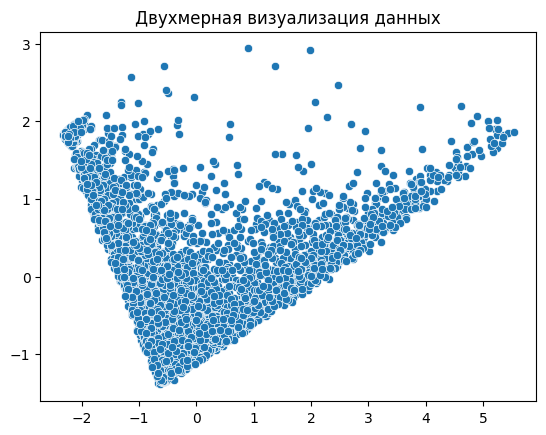

In [60]:
# Визуализация понижения размерности
sns.scatterplot(x=st_principal_comp[:,0], y=st_principal_comp[:,1])
plt.title('Двухмерная визуализация данных')
plt.show()

In [61]:
# Функция для расчета коэффициента силуэта
def get_silhouette(cluster_num, X, method):
    if method == 'kmeans':
        model = KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    elif method == 'gmm':
        model = GMM(n_components=cluster_num, random_state=42, init_params='random_from_data')
    elif method == 'agglomerative':
        model = AC(n_clusters=cluster_num)
    model.fit(X)
    labels = model.predict(X) if method == 'gmm' else model.labels_
    silhouette = silhouette_score(X, labels)
    return silhouette

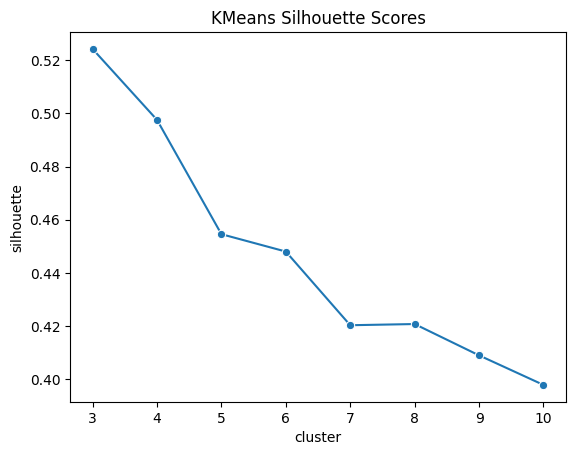

In [62]:
# Анализ коэффициента силуэта для KMeans
silhouette_res_kmeans = {"silhouette": [], "cluster": []}
for cluster_num in range(3, 11):
    silhouette_res_kmeans["silhouette"].append(get_silhouette(cluster_num, st_principal_comp, 'kmeans'))
    silhouette_res_kmeans["cluster"].append(cluster_num)
k_means_silhouette_df = pd.DataFrame(silhouette_res_kmeans)
sns.lineplot(data=k_means_silhouette_df, x="cluster", y="silhouette", marker="o")
plt.title('KMeans Silhouette Scores')
plt.show()

**Вывод по результатам анализа коэффициента силуэта для KMeans**

На графике зависимости коэффициента силуэта от количества кластеров для метода KMeans видно, что максимальное значение коэффициента силуэта достигается при количестве кластеров, равном 3. При дальнейшем увеличении количества кластеров коэффициент силуэта постепенно снижается. Это свидетельствует о том, что сегментация данных на 3 кластера является наиболее оптимальной и обеспечивает наилучшую интерпретацию и качество кластеризации.

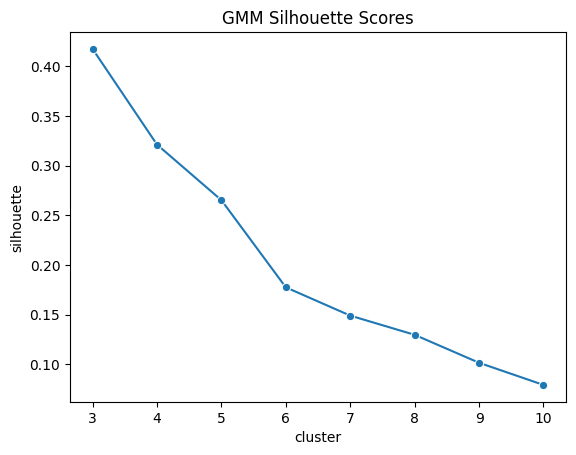

In [63]:
# Анализ коэффициента силуэта для GMM
silhouette_res_gmm = {"silhouette": [], "cluster": []}
for cluster_num in range(3, 11):
    silhouette_res_gmm["silhouette"].append(get_silhouette(cluster_num, st_principal_comp, 'gmm'))
    silhouette_res_gmm["cluster"].append(cluster_num)
gmm_silhouette_df = pd.DataFrame(silhouette_res_gmm)
sns.lineplot(data=gmm_silhouette_df, x="cluster", y="silhouette", marker="o")
plt.title('GMM Silhouette Scores')
plt.show()

**Вывод по результатам анализа коэффициента силуэта для GMM** 

На графике зависимости коэффициента силуэта от количества кластеров для метода GMM (Gaussian Mixture Model) видно, что максимальное значение коэффициента силуэта достигается при количестве кластеров, равном 3. При дальнейшем увеличении количества кластеров коэффициент силуэта существенно снижается. Это указывает на то, что сегментация данных на 3 кластера является наиболее оптимальной и обеспечивает наилучшее качество кластеризации для метода GMM.

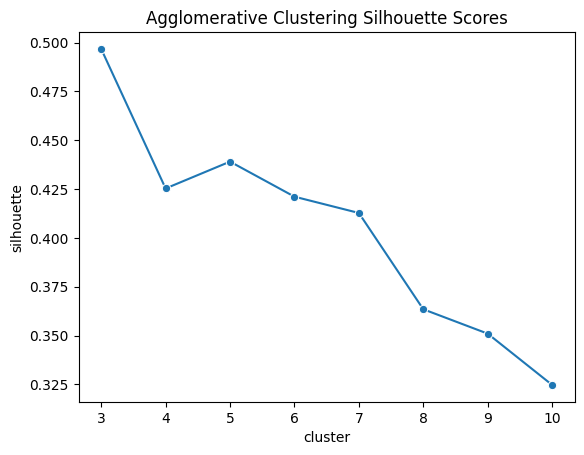

In [64]:
# Анализ коэффициента силуэта для Agglomerative Clustering
silhouette_res_ac = {"silhouette": [], "cluster": []}
for cluster_num in range(3, 11):
    silhouette_res_ac["silhouette"].append(get_silhouette(cluster_num, st_principal_comp, 'agglomerative'))
    silhouette_res_ac["cluster"].append(cluster_num)
ac_silhouette_df = pd.DataFrame(silhouette_res_ac)
sns.lineplot(data=ac_silhouette_df, x="cluster", y="silhouette", marker="o")
plt.title('Agglomerative Clustering Silhouette Scores')
plt.show()

**Вывод по результатам анализа коэффициента силуэта для Agglomerative Clustering**

На графике зависимости коэффициента силуэта от количества кластеров для метода агломеративной кластеризации видно, что максимальное значение коэффициента силуэта достигается при количестве кластеров, равном 3. При дальнейшем увеличении количества кластеров коэффициент силуэта постепенно снижается. Это указывает на то, что сегментация данных на 3 кластера является наиболее оптимальной и обеспечивает наилучшее качество кластеризации для метода агломеративной кластеризации.

**Общий вывод по всем анализам**


На основании анализа коэффициента силуэта для трех различных методов кластеризации — KMeans, GMM и агломеративной кластеризации — можно сделать следующие выводы:

1. KMeans:

* Оптимальное количество кластеров: 3
* Максимальное значение коэффициента силуэта: около 0.52

2. GMM:

* Оптимальное количество кластеров: 3
* Максимальное значение коэффициента силуэта: около 0.40

3. Agglomerative Clustering:

* Оптимальное количество кластеров: 3
* Максимальное значение коэффициента силуэта: около 0.50

Для всех трех методов кластеризации оптимальным количеством кластеров является 3, при этом метод KMeans показывает наилучший коэффициент силуэта, что свидетельствует о наиболее четкой и интерпретируемой сегментации данных.

Таким образом, можно заключить, что для сегментации клиентов на основе RFM-характеристик метод KMeans с 3 кластерами является наиболее предпочтительным, так как он обеспечивает наилучшее качество кластеризации и наибольшее значение коэффициента силуэта.

In [68]:
# Определение лучшего метода и количества кластеров на основе коэффициента силуэта
best_method = 'kmeans'  
best_cluster_num = 3  

# Финальная кластеризация с использованием лучшего метода и количества кластеров
final_model = KMeans(n_clusters=best_cluster_num, init='k-means++', n_init=10, random_state=42)
final_model.fit(st_principal_comp)
labels = final_model.labels_

# Добавление меток кластеров в RFM-таблицу
rfm_filtered['Cluster'] = labels

### 3.2. Интерпретация результатов кластеризации

Перейдём к интерпретации полученных кластеров.

#### 3.2.1. Визуализация кластеров

Визуализируйте результаты в виде 3D-диаграммы с осями Recency, Frequency и Monetary. Проанализируйте полученную диаграмму и попробуйте понять, какие кластеры у вас получились.

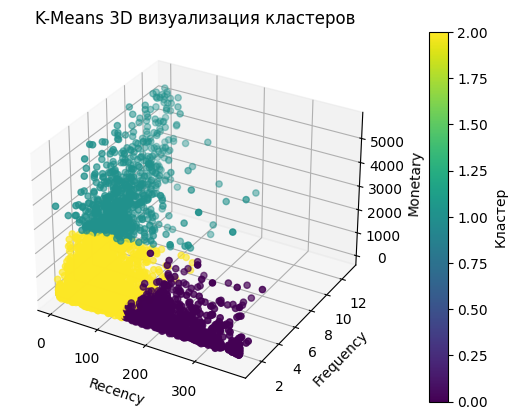

In [86]:
# Создание 3D-графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Построение 3D-диаграммы
scatter = ax.scatter(
    xs=rfm_filtered['Recency'], 
    ys=rfm_filtered['Frequency'], 
    zs=rfm_filtered['Monetary'], 
    c=rfm_filtered['Cluster'], 
    cmap='viridis'
)

# Установка заголовка и меток осей
ax.set_title("K-Means 3D визуализация кластеров")
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")

# Отображение цветовой шкалы
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Кластер')

plt.show()

Анализ кластеров

1. Кластер 0 (желтый):

* Клиенты с высокой давностью последней покупки.
* Низкая частота покупок.
* Средняя денежная ценность.
* Вероятно, это клиенты, которые сделали одну или несколько покупок и долгое время не возвращались.

2. Кластер 1 (бирюзовый):

* Клиенты с низкой давностью последней покупки.
* Высокая частота покупок.
* Высокая денежная ценность.
* Это лояльные клиенты, которые часто совершают покупки и тратят значительные суммы.

3. Кластер 2 (фиолетовый):

* Клиенты с высокой давностью последней покупки.
* Низкая частота покупок.
* Низкая денежная ценность.
* Вероятно, это клиенты, которые сделали одну-две покупки и больше не возвращались.

Заключение

Визуализация позволяет четко различать кластеры и интерпретировать характеристики клиентов в каждом из них. Это важно для разработки целевых маркетинговых стратегий. Например:

* Клиентов из кластера 1 (бирюзовый) можно рассматривать как основных, лояльных клиентов, на которых стоит направлять маркетинговые усилия для удержания.
* Клиентов из кластера 0 (желтый) можно попытаться реанимировать с помощью специальных предложений или акций, чтобы вернуть их активность.
* Клиентов из кластера 2 (фиолетовый) можно считать потерянными, и маркетинговые усилия могут быть направлены на понимание причин их ухода.

Такой анализ помогает лучше понять структуру клиентской базы и более эффективно планировать маркетинговые кампании.

#### 3.2.2. Построение профиля кластеров

Далее составьте так называемый профиль кластеров. Для этого вам необходимо вернуться от декомпозированных данных (если вы производили понижение размерности) к RFM-таблице (очищенной от выбросов).

Сгруппируйте RFM-таблицу по полученным кластерам и рассчитайте среднее по каждому из признаков.

Чтобы результаты было проще интерпретировать, давайте познакомимся с одним из способов визуализации профиля кластеров — **Radar Chart** (полярная диаграмма, или диаграмма паутины). Это графическое представление значений нескольких эквивалентных категорий в форме паутины.

Radar Chart часто используется при определении профиля кластеров. На концах паутины откладываются оси, соответствующие признакам, описывающим объекты. На каждой из осей для каждого кластера откладываются средние значения соответствующих характеристик. Соединив точки по осям, мы получаем многоугольник. 

Пример полярной диаграммы для задачи кластеризации учеников по интересам:

<img src=https://www.datanovia.com/en/wp-content/uploads/2020/12/radar-chart-in-r-customized-fmstb-radar-chart-1.png width=500>

На этой диаграмме мы видим визуализацию признаков для одного из кластеров. Видно, что ученики, принадлежащие этому кластеру, в большей степени увлекаются музыкой (Music), а в меньшей — программированием (Programm).

В модуле `graph_objects` библиотеки `plotly` есть встроенная функция `Scatterpolar`, которая позволяет построить полярную диаграмму. На основе этой функции мы подготовили для вас функцию `plot_cluster_profile()`, которая позволяет визуализировать профиль каждого из кластеров в виде полярной диаграммы. У неё есть два параметра: `grouped_data` — сгруппированные по кластерам характеристики объектов (клиентов), `n_clusters` — количество кластеров.

Главное условие использования полярной диаграммы — все признаки должны быть приведены к единому масштабу с помощью нормализации, где 1 будет означать максимум, а 0 — минимум. Шаг с нормализацией мы также добавили в функцию `plot_cluster_profile()`.


In [83]:
# Группировка по кластерам и получение средних значений признаков для полученной группировки
rfm_group = rfm_filtered.groupby('Cluster').agg({
    'Recency': 'mean', 
    'Frequency': 'mean', 
    'Monetary': 'mean'
})

In [84]:
def plot_cluster_profile(grouped_data, n_clusters):
    """Функция для визуализации профиля кластеров в виде полярной диаграммы.

    Args:
        grouped_data (DataFrame): таблица, сгруппированная по номерам кластеров с агрегированными характеристиками объектов.
        n_clusters (int): количество кластеров
    """
    # Нормализуем сгруппированные данные, приводя их к масштабу 0-1.
    scaler = preprocessing.MinMaxScaler()
    grouped_data = pd.DataFrame(scaler.fit_transform(grouped_data), columns=grouped_data.columns)
    # Создаём список признаков
    features = grouped_data.columns
    # Создаём пустую фигуру
    fig = go.Figure()
    # В цикле визуализируем полярную диаграмму для каждого кластера
    for i in range(n_clusters):
        # Создаём полярную диаграмму и добавляем её на общий график
        fig.add_trace(go.Scatterpolar(
            r=grouped_data.iloc[i].values, # радиусы
            theta=features, # название засечек
            fill='toself', # заливка многоугольника цветом
            name=f'Cluster {i}', # название — номер кластера
        ))
    # Обновляем параметры фигуры
    fig.update_layout(
        showlegend=True, # отображение легенды
        autosize=False, # устаналиваем свои размеры графика
        width=800, # ширина (в пикселях)
        height=800, # высота (в пикселях)
    )
    # Отображаем фигуру
    fig.show()

Теперь у вас есть удобный инструмент для анализа профиля кластеров. Воспользуйтесь им, чтобы проинтерпретировать результаты, полученные на предыдущем шаге.

In [85]:
# Определение количества кластеров
n_clusters = rfm_group.shape[0]

# Визуализация профиля кластеров
plot_cluster_profile(rfm_group, n_clusters)

Анализ профиля кластеров

1. Кластер 0 (синий):

* Низкие значения по всем характеристикам: Recency, Frequency и Monetary.
* Это указывает на клиентов, которые редко совершают покупки и тратят небольшие суммы. Вероятно, это клиенты с низкой активностью и минимальной вовлеченностью.

2. Кластер 1 (оранжевый):

* Высокие значения частоты покупок (Frequency) и денежной ценности (Monetary), низкое значение давности (Recency).
* Это клиенты, которые часто совершают покупки и тратят значительные суммы, что делает их наиболее ценными клиентами.

3. Кластер 2 (бирюзовый):

* Умеренные значения по всем характеристикам: Recency, Frequency и Monetary.
* Это клиенты со средней активностью, которые совершают покупки не так часто, как клиенты из кластера 1, но также не являются полностью пассивными.

Заключение

Профиль кластеров позволяет нам четко различать группы клиентов по их поведению и покупательской активности. Это важно для разработки целевых маркетинговых стратегий:

* Кластер 0: Клиенты, которым можно предложить специальные акции или стимулирующие кампании для повышения их покупательской активности.
* Кластер 1: Лояльные и высокоактивные клиенты, на которых стоит направить усилия по удержанию и поощрению.
* Кластер 2: Клиенты со средней активностью, для которых можно разработать стратегии по повышению их вовлеченности и увеличению частоты покупок.

Визуализация профиля кластеров с помощью полярной диаграммы помогает лучше понять различия между клиентскими сегментами и эффективно планировать маркетинговые кампании.

## 5. Выводы и оформление работы

Напишите заключение о проделанной работе и полученных результатах. Отметьте, какие сегменты клиентов вам удалось найти в данных.

После завершения проекта создайте в своём репозитории файл README.md и кратко опишите содержимое проекта по принципу, который мы приводили ранее.

Выложите свой проект на GitHub и оформите удалённый репозиторий, добавив в него описание и теги репозитория (теги придумайте самостоятельно в зависимости от того, какую задачу вы решали).

# Заключение о проделанной работе и полученных результатах

## В ходе выполнения проекта по сегментации клиентов онлайн-магазина подарков мы прошли через несколько ключевых этапов:

### Предобработка данных:

- Проведена очистка данных, включая обработку пропусков, удаление дубликатов и корректировку транзакций с отрицательными значениями.
- Удалены выбросы, влияющие на результаты кластеризации.
- Добавлены новые признаки, такие как общая стоимость заказа, день недели и время дня.

### Проведение RFM-анализа:

- Рассчитаны характеристики RFM (Recency, Frequency, Monetary) для каждого клиента.
- Выполнена нормализация данных для последующего анализа.

### Кластеризация:

- Применены методы кластеризации KMeans, GMM и Agglomerative Clustering.
- Выбрано оптимальное количество кластеров на основе коэффициента силуэта.
- Метод KMeans с 3 кластерами показал наилучший результат.

### Интерпретация результатов кластеризации:

- Визуализированы результаты кластеризации в 3D.
- Построены профили кластеров с использованием полярных диаграмм.
- Выделены и охарактеризованы три сегмента клиентов:
  - **Кластер 0:** Клиенты с низкой активностью, редко совершающие покупки и тратящие небольшие суммы.
  - **Кластер 1:** Лояльные и высокоактивные клиенты, часто совершающие покупки и тратящие значительные суммы.
  - **Кластер 2:** Клиенты со средней активностью, совершающие покупки не так часто, но и не полностью пассивные.

## Выводы

Анализ позволил выделить три четких сегмента клиентов, что дает возможность более эффективно планировать маркетинговые кампании и разработку стратегий по удержанию клиентов. Выделение сегментов на основе RFM-характеристик помогает определить лояльных клиентов, клиентов со средней активностью и клиентов с низкой активностью, что важно для целевого маркетинга и повышения доходности бизнеса.
